## Table of Contents


#### 01. Importing Libraries
#### 02. Address PII Data
#### 03. Regional Segmentations
#### 04. Low Activity Exclusions
#### 05. Export

## 01. Import Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy 

In [2]:
# Defining path
path = r'/Users/kurtson/Desktop/Instacart Basket Analysis'

In [3]:
# Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','df_full.pkl'))

## 02. Address PII Data

In [4]:
# scan for any PII data that may need removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32406041 entries, 0 to 32406040
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                object  
 3   order_number            int8    
 4   order_dow               int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float16 
 7   product_id              int32   
 8   add_to_cart_order       int8    
 9   reordered               int8    
 10  _merge                  category
 11  Unnamed: 0              int8    
 12  product_name            object  
 13  aisle_id                int8    
 14  department_id           int32   
 15  prices                  float16 
 16  busiest_day             object  
 17  Busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int8    
 20  loyalty_flag            object  
 21  mean_p

In [5]:
#remove names from the data
df =df.drop(columns=['first_name'])

In [6]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages


## 03. Regional Segmentations

In [7]:
#designate regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan','Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana', 'Missouri']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Washington', 'Oregon', 'California', 'Alaska', 'Hawaii' ]

In [8]:
#create regional columns
df.loc[df['state'].isin (Northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin (Midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin (South), 'region'] = 'South'
df.loc[df['state'].isin (West), 'region'] = 'West'

In [9]:
#verify
df[['region']].head(100)

,region
0,South
1,South
2,South
3,South
4,South
...,...
95,West
96,West
97,West
98,West


In [10]:
# create bar chart
regional_spending = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

Text(0.5, 1.0, 'Regional Spending')

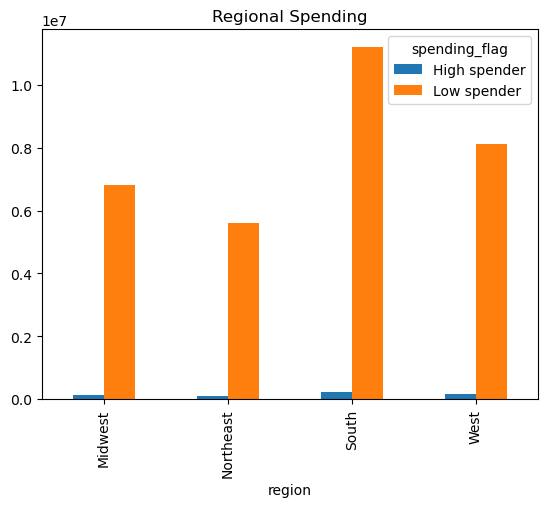

In [11]:
bar_regional_spending = regional_spending.plot.bar()
plt.title('Regional Spending')

In [12]:
bar_regional_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'bar_regional_spending.png'))

## 04. Low Activity Exclusions

In [13]:
# create columns for high activity and low activity

df.loc[df['max_order']>=5,'customer_activity']='High Activity Customer'

In [14]:
df.loc[df['max_order']<=5,'customer_activity']='Low Activity Customer'

In [15]:
# verify
df['customer_activity'].value_counts(dropna=False)

customer_activity
High Activity Customer    30172510
Low Activity Customer      2233531
Name: count, dtype: int64

In [16]:
# create subset of low activity customers
low_activity = df[df['customer_activity']=='Low Activity Customer']

In [17]:
low_activity.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,n_dependants,fam_status,income,department,region,customer_activity
282,520620,120,prior,1,3,11,NaN,196,2,0,...,Female,Kentucky,54,3/2/2017,2,married,99219,beverages,South,Low Activity Customer
283,3273029,120,prior,3,2,8,19.0,196,2,1,...,Female,Kentucky,54,3/2/2017,2,married,99219,beverages,South,Low Activity Customer
284,520620,120,prior,1,3,11,NaN,46149,1,0,...,Female,Kentucky,54,3/2/2017,2,married,99219,beverages,South,Low Activity Customer
285,3273029,120,prior,3,2,8,19.0,46149,1,1,...,Female,Kentucky,54,3/2/2017,2,married,99219,beverages,South,Low Activity Customer
286,906054,120,prior,2,4,7,15.0,31102,1,0,...,Female,Kentucky,54,3/2/2017,2,married,99219,beverages,South,Low Activity Customer


In [18]:
#export
low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','Low_activity_customers.pkl'))

In [19]:
# create subset of high activity customers
high_activity = df[df['customer_activity']=='High Activity Customer']

In [20]:
#export high activity
high_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_customers.pkl'))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32406041 entries, 0 to 32406040
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                object  
 3   order_number            int8    
 4   order_dow               int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float16 
 7   product_id              int32   
 8   add_to_cart_order       int8    
 9   reordered               int8    
 10  _merge                  category
 11  Unnamed: 0              int8    
 12  product_name            object  
 13  aisle_id                int8    
 14  department_id           int32   
 15  prices                  float16 
 16  busiest_day             object  
 17  Busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int8    
 20  loyalty_flag            object  
 21  mean_p

## 05. Export

In [22]:
#export data with regions 
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_regions.pkl'))